# Random Forest
- Supeervised ML
- Moslty used in classification
- Both categorical and continuous input/output variables

In [1]:
import   pandas as pd
import   numpy as np
import   matplotlib.pyplot as plt
from     matplotlib import rcParams
import   seaborn as sns
%matplotlib inline

In [2]:
from sklearn.ensemble        import RandomForestClassifier           
from sklearn.model_selection import train_test_split
from sklearn.metrics         import accuracy_score, confusion_matrix, plot_roc_curve,\
                             classification_report, roc_auc_score, roc_curve, precision_score

from sklearn.preprocessing import LabelEncoder

# Breast Cancer

In [4]:
data = pd.read_csv('Breast Cancer.csv')

In [5]:
data.shape

(569, 31)

In [6]:
data.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


### Check missing values

In [7]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


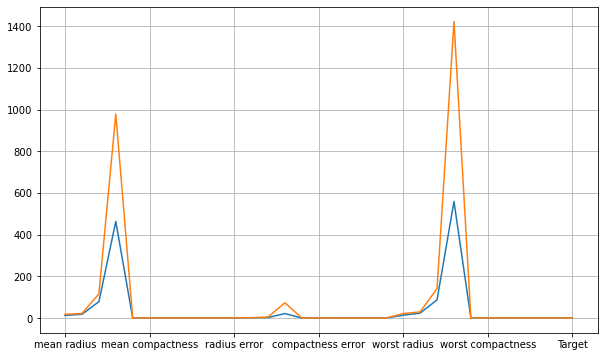

In [10]:
plt.figure(figsize=(10,6))
filter = data['Target'] == 1
data[filter].mean().plot()
#plt.axis('off')
filter = data['Target'] == 0
data[filter].mean().plot()
plt.grid()

In [11]:
filter = data['Target'] == 1
data_yes = data[filter].mean()
filter = data['Target'] == 0
data_no = data[filter].mean()

In [12]:
mean_data = pd.DataFrame({'yes':data_yes, 'no':data_no}, index=data_yes.index)

In [13]:
mean_data

,yes,no
mean radius,12.146524,17.462830
mean texture,17.914762,21.604906
mean perimeter,78.075406,115.365377
mean area,462.790196,978.376415
mean smoothness,0.092478,0.102898
mean compactness,0.080085,0.145188
mean concavity,0.046058,0.160775
mean concave points,0.025717,0.087990
mean symmetry,0.174186,0.192909
mean fractal dimension,0.062867,0.062680


In [14]:
mean_data['variance'] = np.absolute(mean_data.yes - mean_data.no)

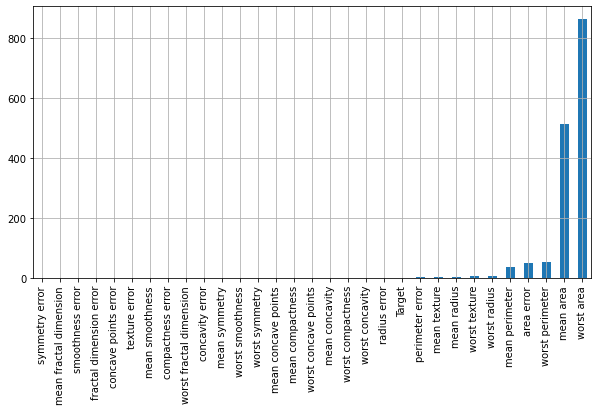

In [15]:
plt.figure(figsize=(10,5))
mean_data.sort_values('variance')['variance'].plot(kind='bar')
plt.grid()

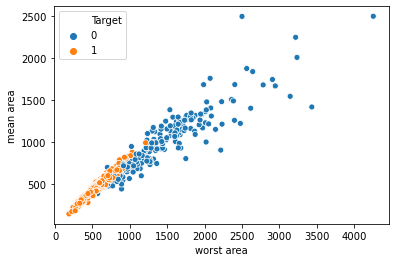

In [16]:
sns.scatterplot('worst area','mean area', hue='Target', data=data)

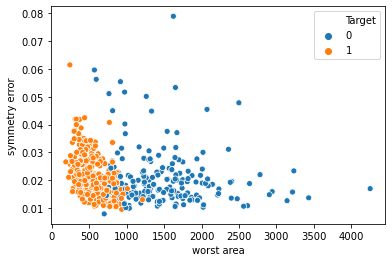

In [17]:
sns.scatterplot('worst area','symmetry error', hue='Target', data=data)

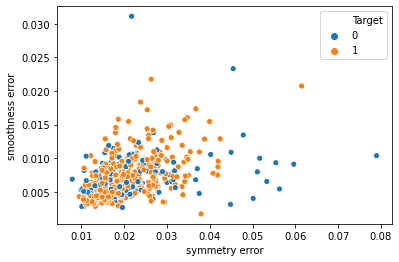

In [18]:
sns.scatterplot('symmetry error','smoothness error', hue='Target', data=data)

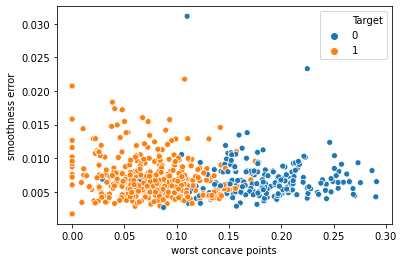

In [19]:
sns.scatterplot('worst concave points','smoothness error', hue='Target', data=data)

### Cobination of Statistical and RF model findings

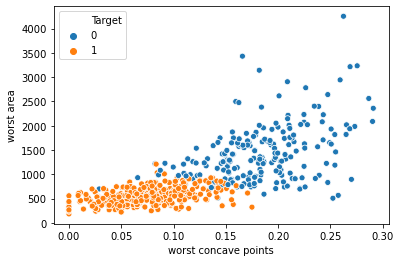

In [20]:
sns.scatterplot('worst concave points','worst area', hue='Target', data=data)

### Check for dupplicate records

In [21]:
data.duplicated().sum()

0

### Split the data

In [22]:
X = data.iloc[:, 0:30]

y = data.iloc[:,-1]

In [23]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.15, random_state=10)

### Build the model

In [74]:
model = RandomForestClassifier()

### Train the model

In [75]:
model.fit(X_train,y_train)

RandomForestClassifier()

### Test the model

### Training data

In [76]:
y_predict_train = model.predict(X_train)
accuracy_score(y_train,y_predict_train)

1.0

In [77]:
pd.crosstab(y_train,y_predict_train)

col_0,0,1
Target,,
0,182,0
1,0,301


### Test data

In [78]:
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9883720930232558

In [79]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Target,,
0,30,0
1,1,55


In [80]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        56

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86



In [81]:
precision_score(y_test, y_predict, average='weighted')

0.9887471867966992

### ROC AUC score

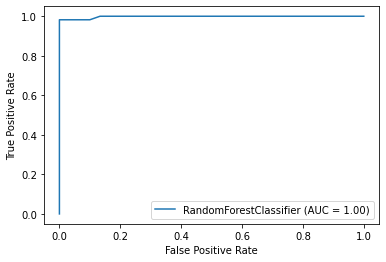

In [82]:
plot_roc_curve(model, X_test, y_test)

### Feature Importance

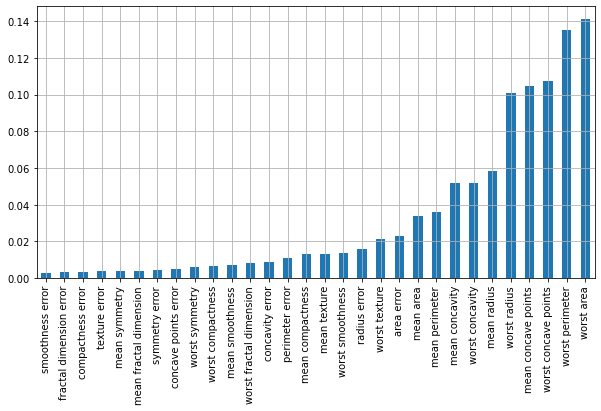

In [83]:
plt.figure(figsize=(10,5))
feat_importance = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance')
feat_importance.Importance.plot(kind='bar')
plt.grid()

### Hyperparameter Tuning

In [84]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [85]:
model = RandomForestClassifier()

In [86]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [90]:
parameters = {'max_depth'      : [6,7,8],
              'random_state'   : [0,5,10],
              'ccp_alpha'     : [0.01, 0.02, 0.03],
              'n_estimators'  : [10, 20,50, 70]
             }

### Grid Search

In [91]:
grid = GridSearchCV(model, param_grid = parameters, cv=5, verbose=0)

In [92]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.01, 0.02, 0.03],
                         'max_depth': [6, 7, 8],
                         'n_estimators': [10, 20, 50, 70],
                         'random_state': [0, 5, 10]})

### Best Score

In [93]:
grid.best_score_

0.9544029209621993

### Best Parameters

In [94]:
grid.best_params_

{'ccp_alpha': 0.01, 'max_depth': 6, 'n_estimators': 50, 'random_state': 0}

### Rebuild the model

In [95]:
model = RandomForestClassifier(ccp_alpha=0.01, max_depth=6, n_estimators= 50, random_state=0)

### Train the model

In [96]:
model.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.01, max_depth=6, n_estimators=50,
                       random_state=0)

### Test the model

In [97]:
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9767441860465116

In [98]:
model.score(X_test, y_test)

0.9767441860465116